In [226]:
import pandas as pd
import numpy as np
from numpy.random import seed

from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt 
import seaborn as sns

In [227]:
df = pd.read_csv('online_shoppers_intention.csv')
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month']].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month
0,0.0,0.0,0.0,0.0,1.0,0.20,0.20,0.0,0.0,Feb
1,0.0,0.0,0.0,0.0,2.0,0.00,0.10,0.0,0.0,Feb
2,0.0,-1.0,0.0,-1.0,1.0,0.20,0.20,0.0,0.0,Feb
3,0.0,0.0,0.0,0.0,2.0,0.05,0.14,0.0,0.0,Feb
4,0.0,0.0,0.0,0.0,10.0,0.02,0.05,0.0,0.0,Feb


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [229]:
df [ ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue'] ].head()



,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,1,1,1,Returning_Visitor,False,False
1,2,2,1,2,Returning_Visitor,False,False
2,4,1,9,3,Returning_Visitor,False,False
3,3,2,2,4,Returning_Visitor,False,False
4,3,3,1,4,Returning_Visitor,True,False


## Data Visualization

#### REVENUE

In [230]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [231]:
df['Revenue'].value_counts()[0]/df['Revenue'].value_counts().sum(), df['Revenue'].value_counts()[1]/df['Revenue'].value_counts().sum()

(0.8452554744525548, 0.15474452554744525)

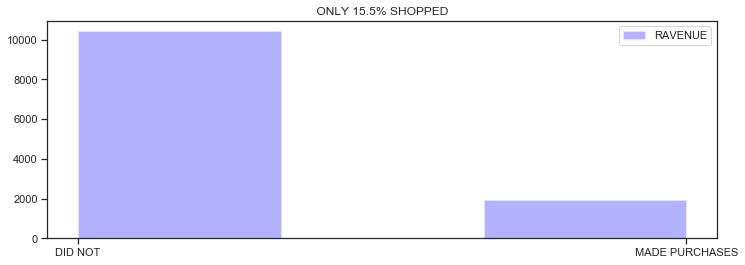

In [232]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else False ).hist(bins=3, alpha=0.3, color='blue', label='RAVENUE')
plt.grid()
plt.xticks([0,1],('DID NOT', 'MADE PURCHASES'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ONLY 15.5% SHOPPED ')
plt.show()

#### WEEKDAYS OR WEEKEND

In [233]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [234]:
df['Weekend'].value_counts()[0]/df['Weekend'].value_counts().sum(), df['Weekend'].value_counts()[1]/df['Weekend'].value_counts().sum()


(0.767396593673966, 0.23260340632603407)

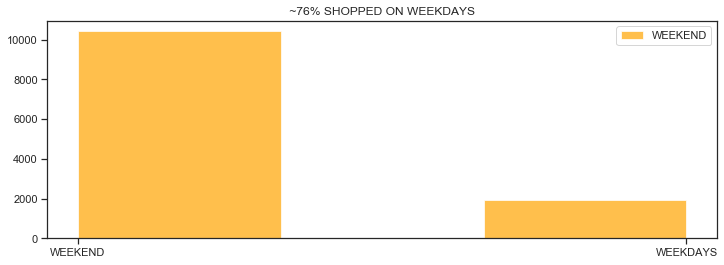

In [235]:
plt.figure(figsize=(12,4))
df['Revenue'].apply(lambda x: 1 if (x==True) else False ).hist(bins=3, alpha=0.7, color='orange', label='WEEKEND')
plt.grid()
plt.xticks([0,1],('WEEKEND', 'WEEKDAYS'))
plt.autoscale(enable=True)
plt.legend()
plt.title(' ~76% SHOPPED ON WEEKDAYS ')
plt.show()

In [236]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [237]:
pie_val = [ df['VisitorType'].value_counts()[0]/df['VisitorType'].value_counts().sum(), df['VisitorType'].value_counts()[1]/df['VisitorType'].value_counts().sum(), df['VisitorType'].value_counts()[1]/df['VisitorType'].value_counts().sum() ]
pie_val


[0.8557177615571776, 0.13738848337388485, 0.13738848337388485]

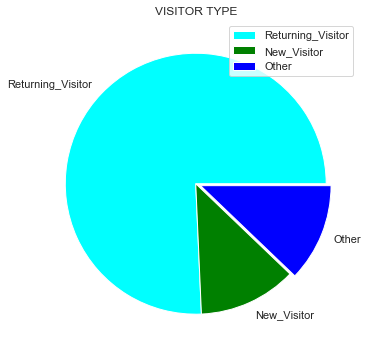

In [238]:
plt.figure(figsize=(6,6))
plt.pie(pie_val, colors = ['cyan', 'green', 'blue'], explode=[0, 0, 0.04], labels = ['Returning_Visitor', 'New_Visitor', 'Other']  )
plt.legend()
plt.title('VISITOR TYPE')
plt.show()

#### OPERATING SYSTEMS

In [239]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [240]:
opsys = []
for val in df['OperatingSystems'].value_counts():
    opsys.append(val)
 

opsys

[6601, 2585, 2555, 478, 79, 19, 7, 6]

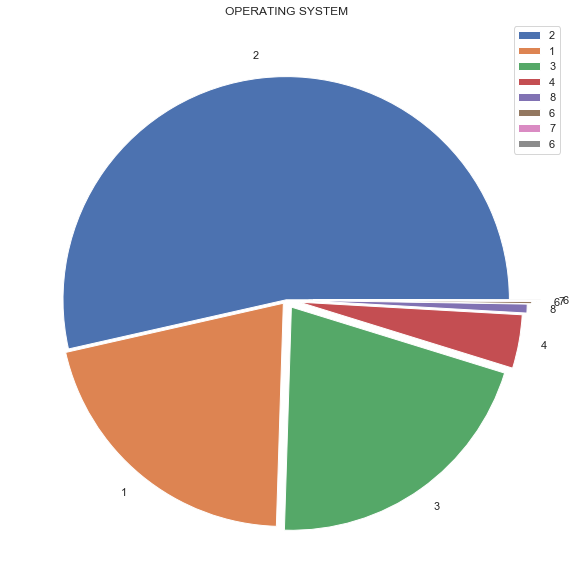

In [241]:
plt.figure(figsize=(10,12))
lab_list = ['2', '1', '3', '4', '8', '6', '7', '6'] 
exp_list = [0, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14]
plt.pie(opsys, labels = lab_list, explode = exp_list )
plt.legend()
plt.title('OPERATING SYSTEM')
plt.show()

### Inferential Statistics

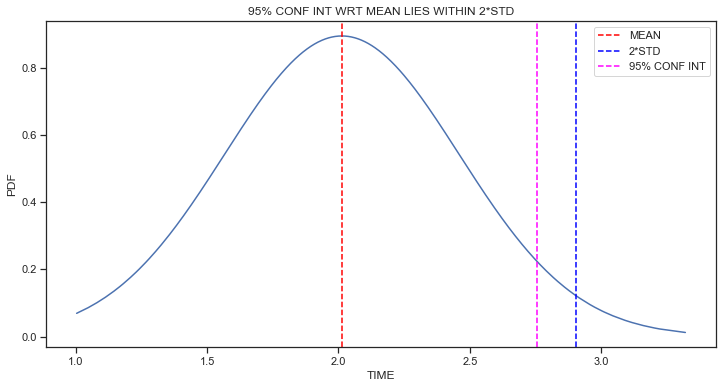

2.0129726101281773 2.0129726101281773


In [291]:
plt.figure(figsize=(12,6))
df1 = df[df['Revenue'] == True]
df1 = df1[ df1['Administrative_Duration'] >10 ]
datalog = np.sort(df1['Administrative_Duration'].apply(np.log10))
datalog_pdf=norm.pdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) ) # scale=np.mean(datalog), lock=np.std(datalog)
datalog_cdf = norm.cdf(datalog, loc=np.mean(datalog), scale=np.std(datalog) )
plt.plot(datalog, datalog_pdf)
plt.axvline(np.mean(datalog), linestyle='--', color='red', label='MEAN')
plt.axvline(np.mean(datalog)+2*np.std(datalog), linestyle='--', color='blue', label='2*STD')
plt.axvline(np.percentile(datalog, [95]), linestyle='--', color='magenta', label='95% CONF INT')
plt.legend()
plt.ylabel('PDF')
plt.xlabel('TIME')
plt.title('95% CONF INT WRT MEAN LIES WITHIN 2*STD')
plt.show()
print(np.mean(datalog), np.mean(datalog))